<h1><i><strong>1. Importing Libraries</strong></i></h1>
<h4>This cell imports the necessary libraries and modules for the project. It includes:</h4>
<ul>
    <li><strong><code>LogisticRegression</code></strong>, <strong><code>GridSearchCV</code></strong>, <strong><code>roc_curve</code></strong>, and <strong><code>auc</code></strong> from <code>sklearn</code> for model training, hyperparameter tuning, and evaluation.</li>
    <li><strong><code>Flatten</code></strong> and <strong><code>to_categorical</code></strong> from <code>keras.api</code> for data preprocessing and one-hot encoding.</li>
    <li><strong><code>matplotlib.pyplot</code></strong> for visualizations.</li>
    <li><strong><code>numpy</code></strong> and <strong><code>pandas</code></strong> for handling data and arrays.</li>
    <li>Adds the custom path to the system to import <strong><code>DataLoader</code></strong> and <strong><code>LABELS</code></strong> from the <code>Persian-Alphabet-Recognition</code> project, which loads the dataset and label mappings.</li>
</ul>


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from keras.api.layers import Flatten
from keras.api.utils import to_categorical
import numpy as np
import pandas as pd
import sys
sys.path.append("F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition")
from Datasets.DataLoader.DataLoader import DataLoader, LABELS

<h1><i><strong>2. Dataset Paths and Hyperparameters</strong></i></h1>
<h4>This cell defines the paths to the datasets and sets various hyperparameters used for model training. These include:</h4>
<ul>
    <li>Paths to three datasets <strong><code>DS-1</code></strong>, <strong><code>DS-2</code></strong>, and <strong><code>DS-3</code></strong> stored locally.</li>
    <li>The <strong><code>REAL_DATA</code></strong> path for testing on real-world data.</li>
    <li>Image size, shrink factor, and input shape for the model.</li>
    <li>The number of output classes (<strong><code>CLASSES</code></strong>) and other settings like <strong><code>THRESHOLD</code></strong> and <strong><code>EPOCHS</code></strong>.</li>
</ul>


In [2]:
DATASET1 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-1"
DATASET2 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-2"
DATASET3 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-3"
REAL_DATA = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\Real Data"

IMAGE_SIZE = 64
SHRINK = 10
INPUT_SHAPE = (64, 64)
CLASSES = 43
THRESHOLD = 100

EPOCHS = 20

<h1><i><strong>3. Data Loading and Preprocessing</strong></i></h1>
<h4>This cell loads the data using the <strong><code>DataLoader</code></strong> class and preprocesses the images. It includes:</h4>
<ul>
    <li>Loading training and test data from the dataset using <strong><code>load_data</code></strong> method.</li>
    <li>Flattening images into 1D arrays for training.</li>
    <li>Visualizing the first 42 training images in a grid for inspection, labeled by their respective class.</li>
</ul>


Loading Files and Dataset ...
Found Categories: ['1-alef', '2-b', '3-p', '4-t', '5-se', '6-jim', '7-che', '8-h', '9-kh', '10-d', '11-zal', '12-r', '13-z', '14-zh', '15-sin', '16-shin', '17-sad', '18-zad', '19-t-long', '20-z-long', '21-ayin', '22-ghyin', '23-f', '24-ghe', '25-k', '26-g', '27-le', '28-m', '29-n', '30-v', '31-he', '32-ye', '33-zero', '34-one', '35-two', '36-three', '37-four', '38-five', '39-six', '40-seven', '41-eight', '42-nine', '43-anewfive'] 

X-Train : (3439, 64, 64)
X-Test : (860, 64, 64)
Y-Train : (3439,)
Y-Test : (860,)


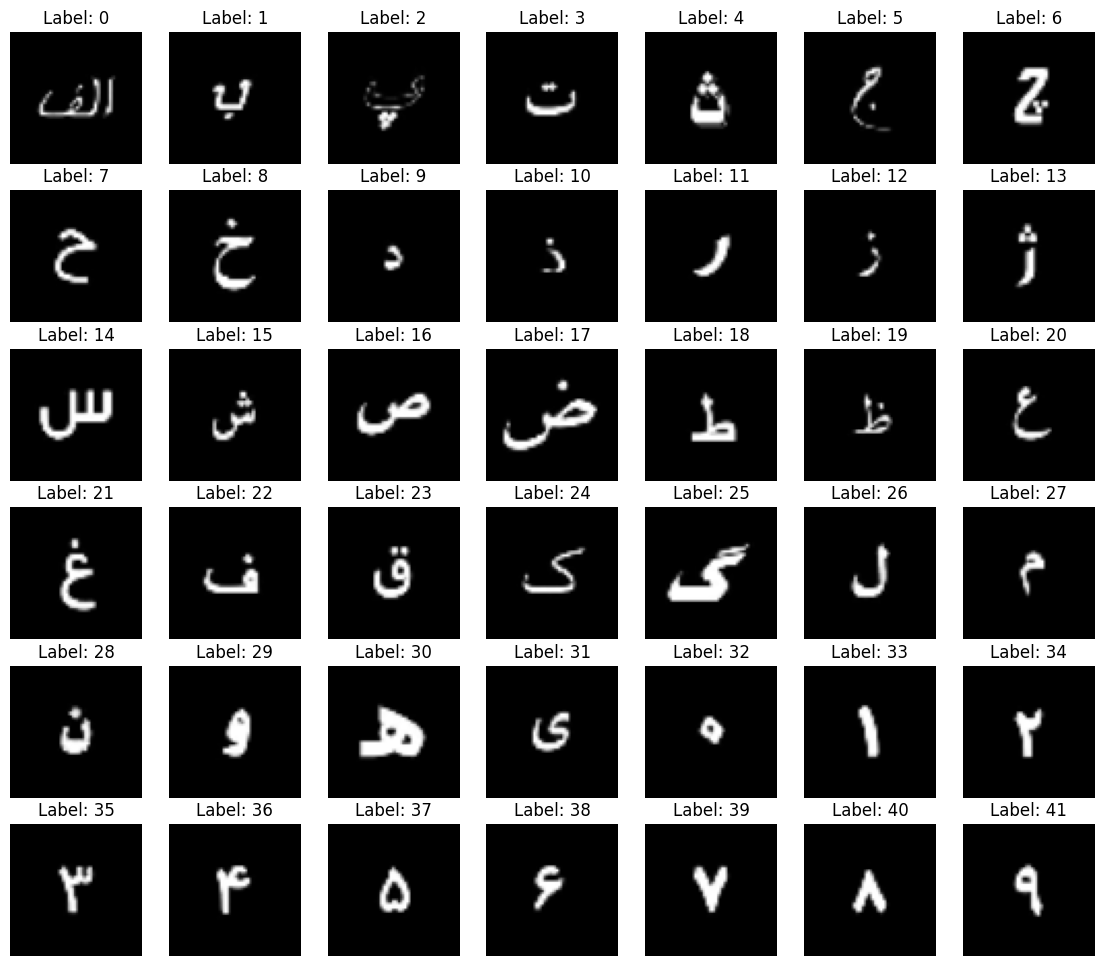

In [8]:
dataloader = DataLoader(path=DATASET1, image_size=IMAGE_SIZE, shrink=SHRINK, contrast=None, padding=0, invert=True)
X_train, y_train, X_test, y_test = dataloader.load_data()


print(f"X-Train : {X_train.shape}")
print(f"X-Test : {X_test.shape}")
print(f"Y-Train : {y_train.shape}")
print(f"Y-Test : {y_test.shape}")

X_train_1d = np.array(Flatten()(X_train))
X_test_1d = np.array(Flatten()(X_test))

used=[]
counter = 0
i = 0
plt.figure(figsize=(14, 12))
while counter != 42:
    while y_train[i] in used or y_train[i]!=counter:
        i+=1
        continue
    used.append(y_train[i])
    plt.subplot(6, 7, counter + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
    counter+=1
plt.show()

<h1><i><strong>4. Logistic Regression Hyperparameter Tuning</strong></i></h1>
<h4>This cell performs hyperparameter tuning for the Logistic Regression model using <strong><code>GridSearchCV</code></strong>. It includes:</h4>
<ul>
    <li>Defining hyperparameters like <strong><code>C</code></strong> (regularization), <strong><code>solver</code></strong>, <strong><code>penalty</code></strong>, and <strong><code>max_iter</code></strong>.</li>
    <li>Finding the best combination of these hyperparameters based on cross-validation score.</li>
</ul>


In [10]:
logreg = LogisticRegression()

logreg_params = {"C": [0.1, 1, 10, 100],
                 "solver": ["lbfgs"],
                 "penalty": ["l2", "none"],
                 "max_iter": [100, 200]}

logreg_grid_search = GridSearchCV(logreg, param_grid=logreg_params, verbose=2)
logreg_grid_search.fit(X_train_1d, y_train)

print(f">> Best Params : {logreg_grid_search.best_params_}")
print(f">> Best Score : {logreg_grid_search.best_score_}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ......C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   5.1s
[CV] END ......C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   5.0s
[CV] END ......C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   5.2s
[CV] END ......C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   5.0s
[CV] END ......C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   5.1s
[CV] END ....C=0.1, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.1, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.1, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.1, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.1, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=200, penalty=l2, solver=lbfgs; total time=   6.7s
[CV] END ......C=0.1, max_iter=200, penalty=l2, 

<h1><i><strong>5. Training the Best Model</strong></i></h1>
<h4>This cell trains the Logistic Regression model with the best hyperparameters obtained from the grid search. It includes:</h4>
<ul>
    <li>Fitting the best Logistic Regression model on the training data using <strong><code>fit</code></strong> method.</li>
</ul>


In [12]:
best_logreg = logreg_grid_search.best_estimator_
best_logreg.fit(X_train_1d, y_train)

LogisticRegression(C=100)

<h1><i><strong>6. Evaluation and ROC Curve Visualization</strong></i></h1>
<h4>This cell evaluates the trained Logistic Regression model and visualizes the performance using ROC curves:</h4>
<ul>
    <li>Generating and plotting ROC curves for each class.</li>
    <li>Displaying the AUC score for each class to assess model performance.</li>
    <li>Visualizing the ROC curves in a grid layout for better comparison between classes.</li>
</ul>


Validation Accuracy : 0.9174418604651163


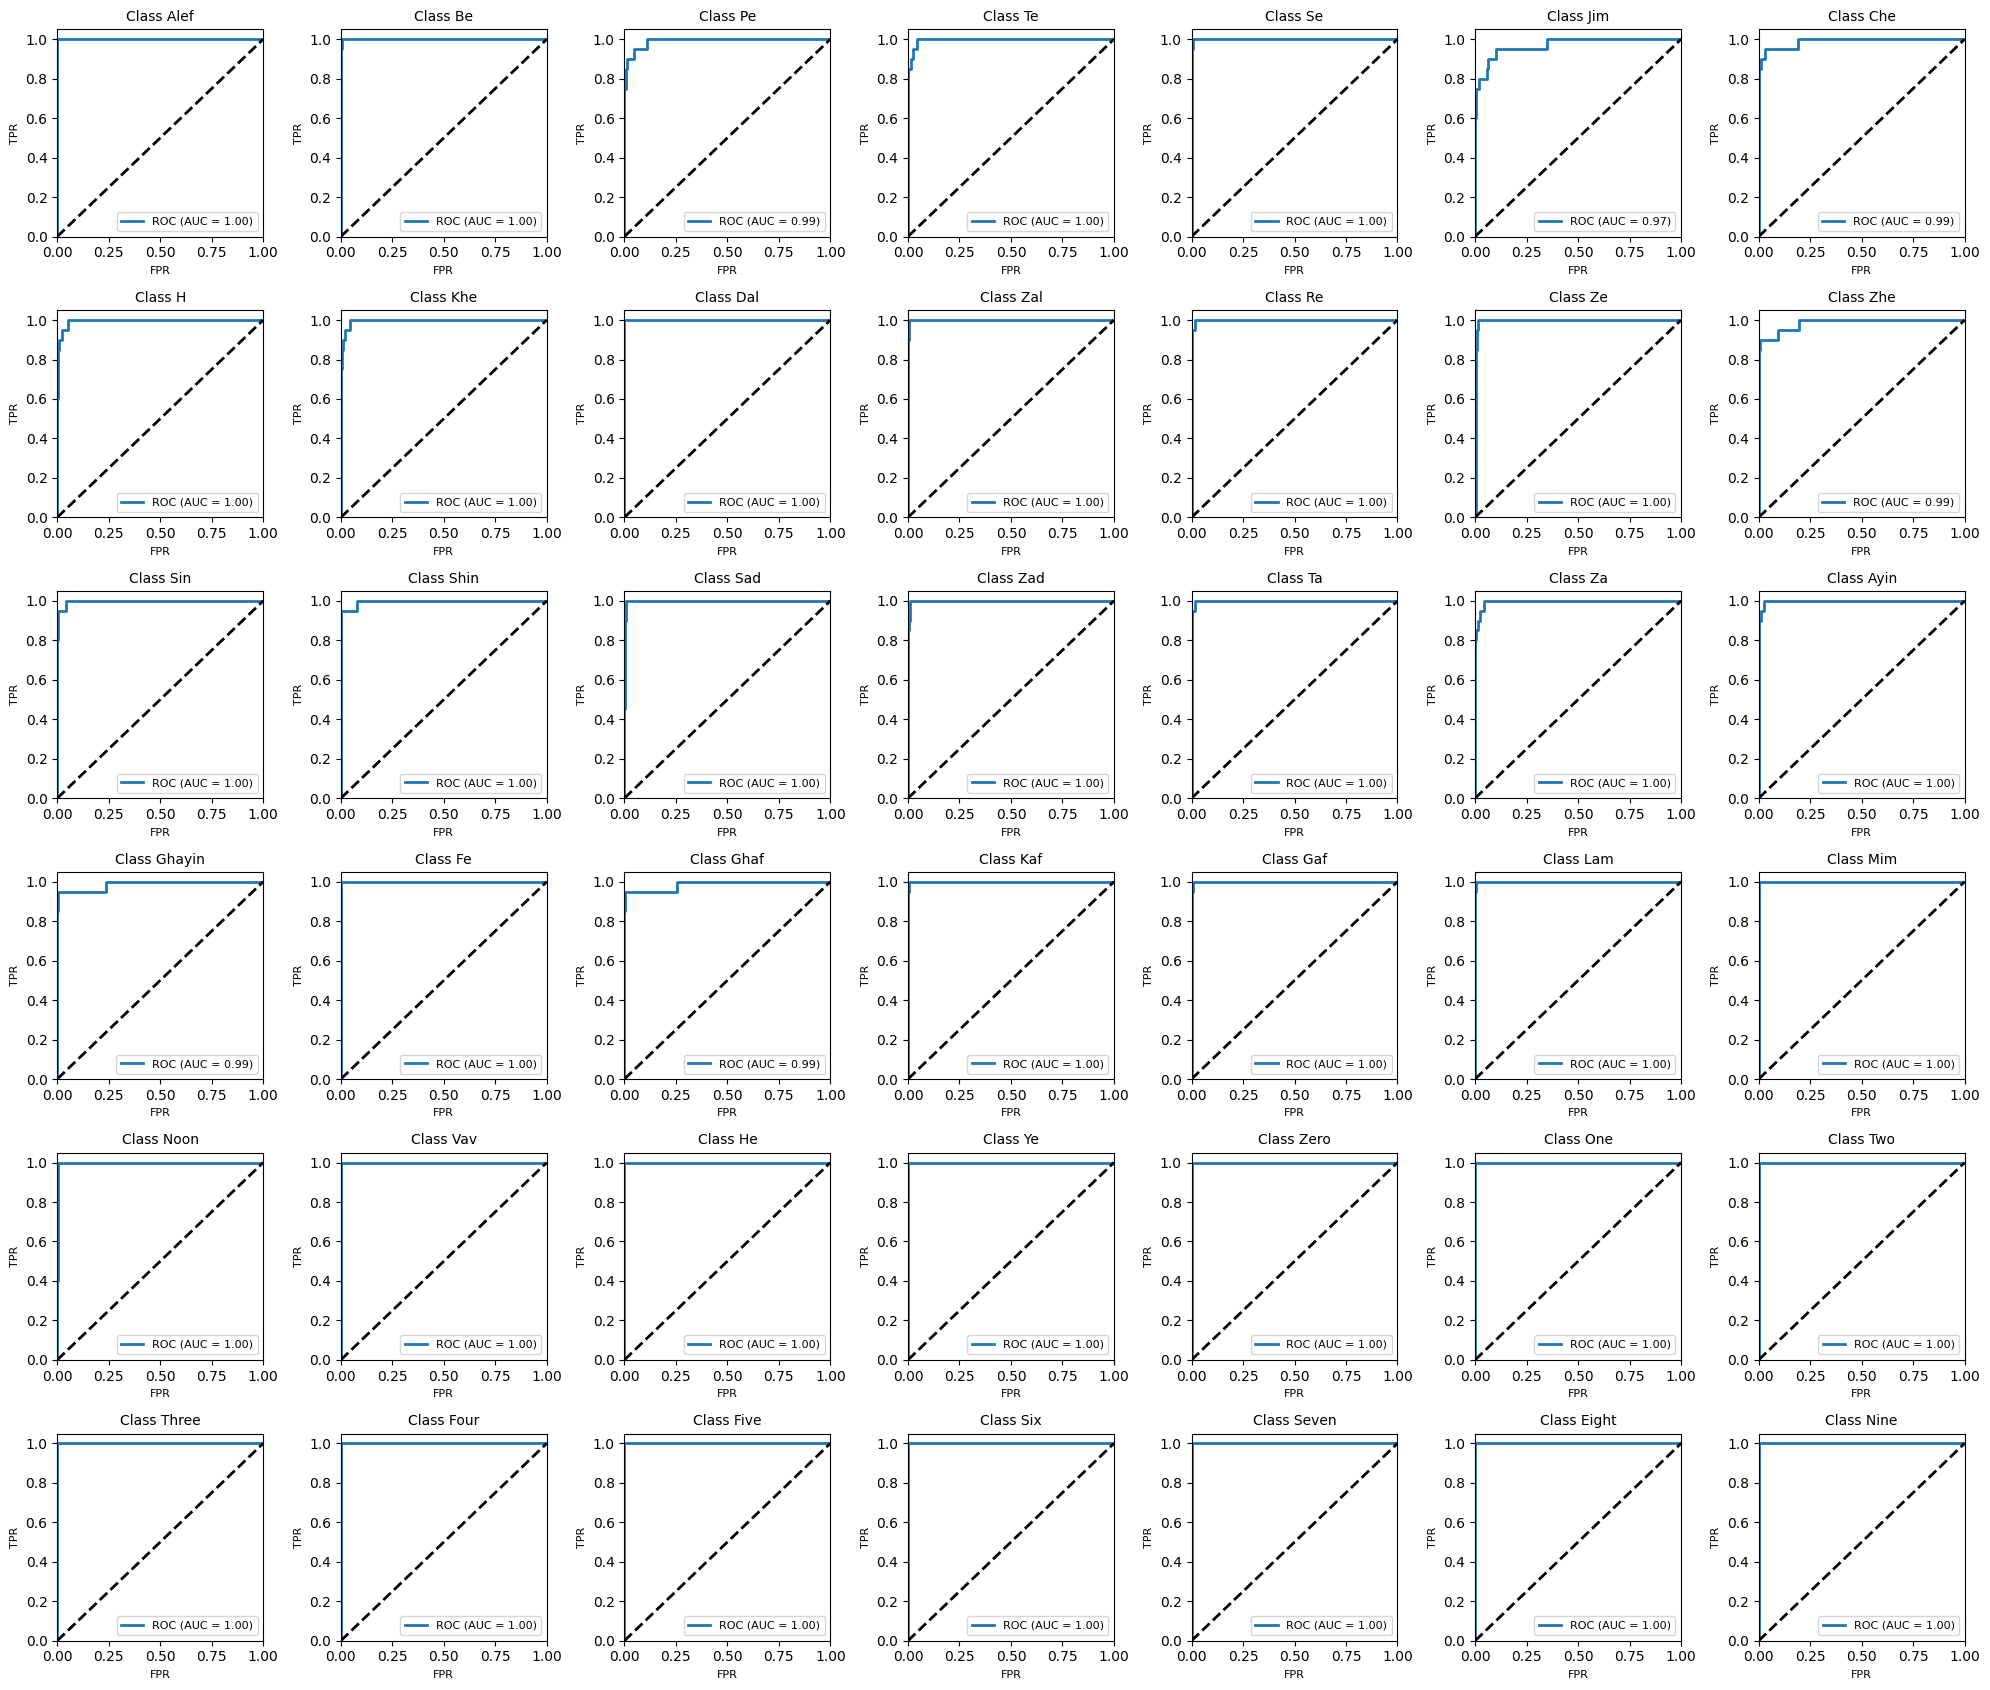

In [13]:
print(f"Validation Accuracy : {best_logreg.score(X_test_1d, y_test)}")

predictions = best_logreg.predict_proba(X_test_1d)

y_test_one_hot = to_categorical(y_test, num_classes=CLASSES)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(CLASSES):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


n_rows = 6  
n_cols = 7  


fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 17))

axes = axes.flatten()

for i in range(CLASSES-1):
    ax = axes[i]
    ax.plot(fpr[i], tpr[i], lw=2, label=f'ROC (AUC = {roc_auc[i]:0.2f})')
    ax.plot([0, 1], [0, 1], 'k--', lw=2)

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_title(f'Class {LABELS[i]}', fontsize=10)
    ax.legend(loc='lower right', fontsize=8)
    ax.set_xlabel('FPR', fontsize=8)
    ax.set_ylabel('TPR', fontsize=8)

for i in range(CLASSES, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

<h1><i><strong>7. Real Data Prediction</strong></i></h1>
<h4>This cell applies the trained Logistic Regression model to predict labels for images in a real-world dataset. It includes:</h4>
<ul>
    <li>Reading and preprocessing real data images from the <strong><code>REAL_DATA</code></strong> directory.</li>
    <li>Reshaping images and making predictions using <strong><code>predict_proba</code></strong> method.</li>
    <li>Visualizing the predicted class for each image along with the image itself.</li>
</ul>


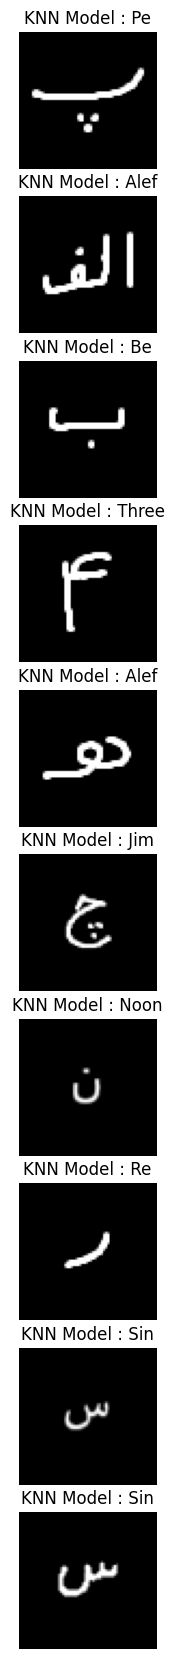

In [ ]:
import os
import cv2 as cv

rows = len(os.listdir(REAL_DATA))

plt.figure(figsize=(4, 21))

for i,img_name in enumerate(os.listdir(REAL_DATA)):
    
    image_path = os.path.join(REAL_DATA, img_name)

    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

    image = dataloader.centerize(image)

    predictions_test = best_logreg.predict_proba(image.reshape(1,INPUT_SHAPE[0]*INPUT_SHAPE[1]))


    plt.subplot(rows, 2, 2*i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f'LogisticRegression Model : {LABELS[np.argmax(predictions_test)]}')
    plt.axis('off')

plt.show()